<div style="color: white; 
            display: fill; 
            border-radius: 5px;
            background-color: black;
            font-size: 300%;
            font-family: cursive;
            text-align: center">
EDA (RTC Severity)
</div>


<a id="top"></a>
**Contents:**

- [Part-1: Univariate Analysis](#univariate "Check Univariate Analysis")
- [Part-2: Bivariate Analysis](#bivariate "Check Bivariate Analysis")
- [Part-3: Multivariate Analysis](#multivariate "Check Multivariate Analysis")

In [1]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

from datetime import datetime
import statistics

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use("default")

In [3]:
CYELLOWBG2 = '\33[103m'
CEND = "\33[0m"

In [4]:
df_accident = pd.read_parquet("../DATA/parquet/accident_data.parquet")
df_accident.shape

(1048575, 34)

In [5]:
df_accident.tail(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.585044,Daylight,Highland,Highland,288730.0,856520.0,-3.862727,None,1,3,0.0,0.0,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.214898,Darkness - no lighting,Highland,Highland,289940.0,815260.0,-3.823997,None,1,2,0.0,0.0,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes
1048574,201091NM02142,None,0.0,Unclassified,0.0,Serious,Other object on road,28/02/2010,Sunday,1.0,Give way or uncontrolled,T or staggered junction,57.575210,Daylight,Highland,Highland,286730.0,855480.0,-3.895673,None,1,1,0.0,0.0,Northern,Wet or damp,Dual carriageway,None,60,15:45,Rural,Snowing no high winds,2010,Yes


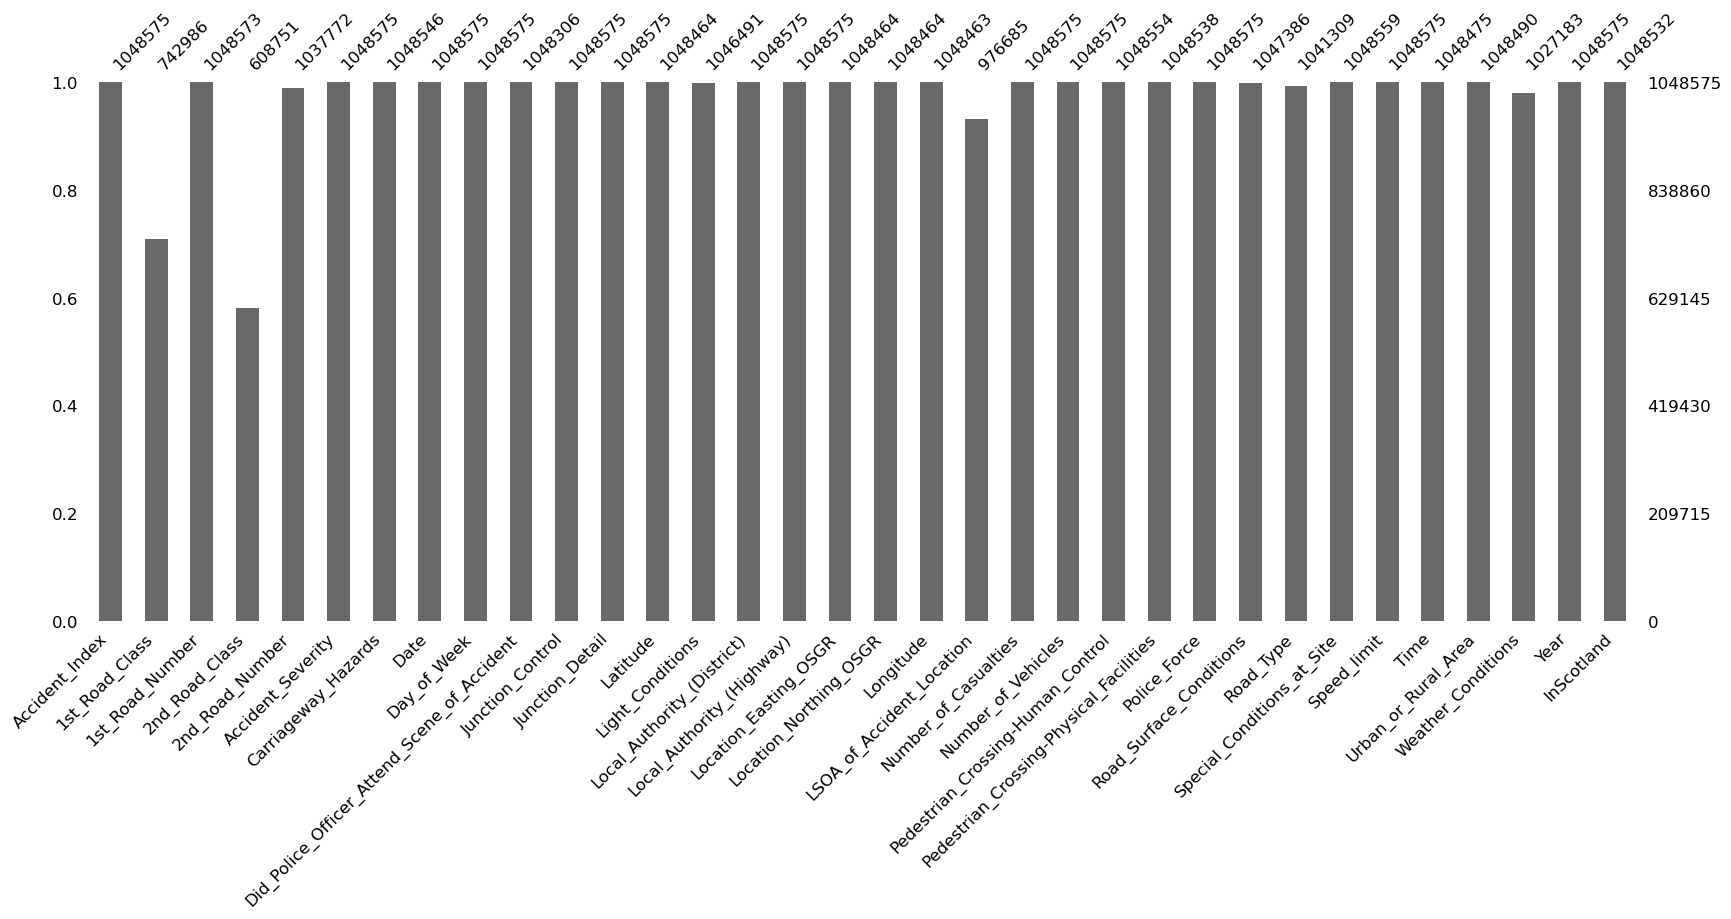

In [6]:
msno.bar(df_accident, figsize=(20, 7), fontsize=12);

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: #90EE90;
            font-size: 200%;
            font-family: cursive;
            text-align: center">
Part-1: Univariate Analysis
</div>

[⬆️TOP⬆️](#top)
<a id="univariate"></a>

**Contents:**

- [1st_Road_Class and 1st_Road_Number](#1st_road)
- [2nd_Road_Class and 2nd_Road_Number](#2nd_road)
- [Carriageway_Hazards](#carriageway_hazards)
- [Date](#date)
- [Accident_Severity](#accident_severity)
- [Day_of_Week](#day_of_week)
- [Time](#time)
- [Junction_Control](#junction_control)
- [Junction_Detail](#junction_detail)
- [Light_Conditions](#light_conditions)
- [Weather_Conditions](#weather_conditions)
- [Number_of_Casualties](#casualties)
- [Number_of_Vehicles](#vehicles)

[⬆️TOP⬆️](#top)
<a id='1st_road'></a>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: 1st_Road_Class and 1st_Road_Number
</div>

In [7]:
print(f"Unique Values in {CYELLOWBG2} 1st_Road_Class {CEND}: {df_accident['1st_Road_Class'].nunique()}, \n{df_accident['1st_Road_Class'].unique()}")

Unique Values in  1st_Road_Class : 5, 
['A' 'B' 'C' None 'Motorway' 'A(M)']


In [8]:
#utility function
def plot_road_class(data, ax, title):
    sns.histplot(x=data, bins=50, ax=ax).set(title=f"Road Class - {title}");

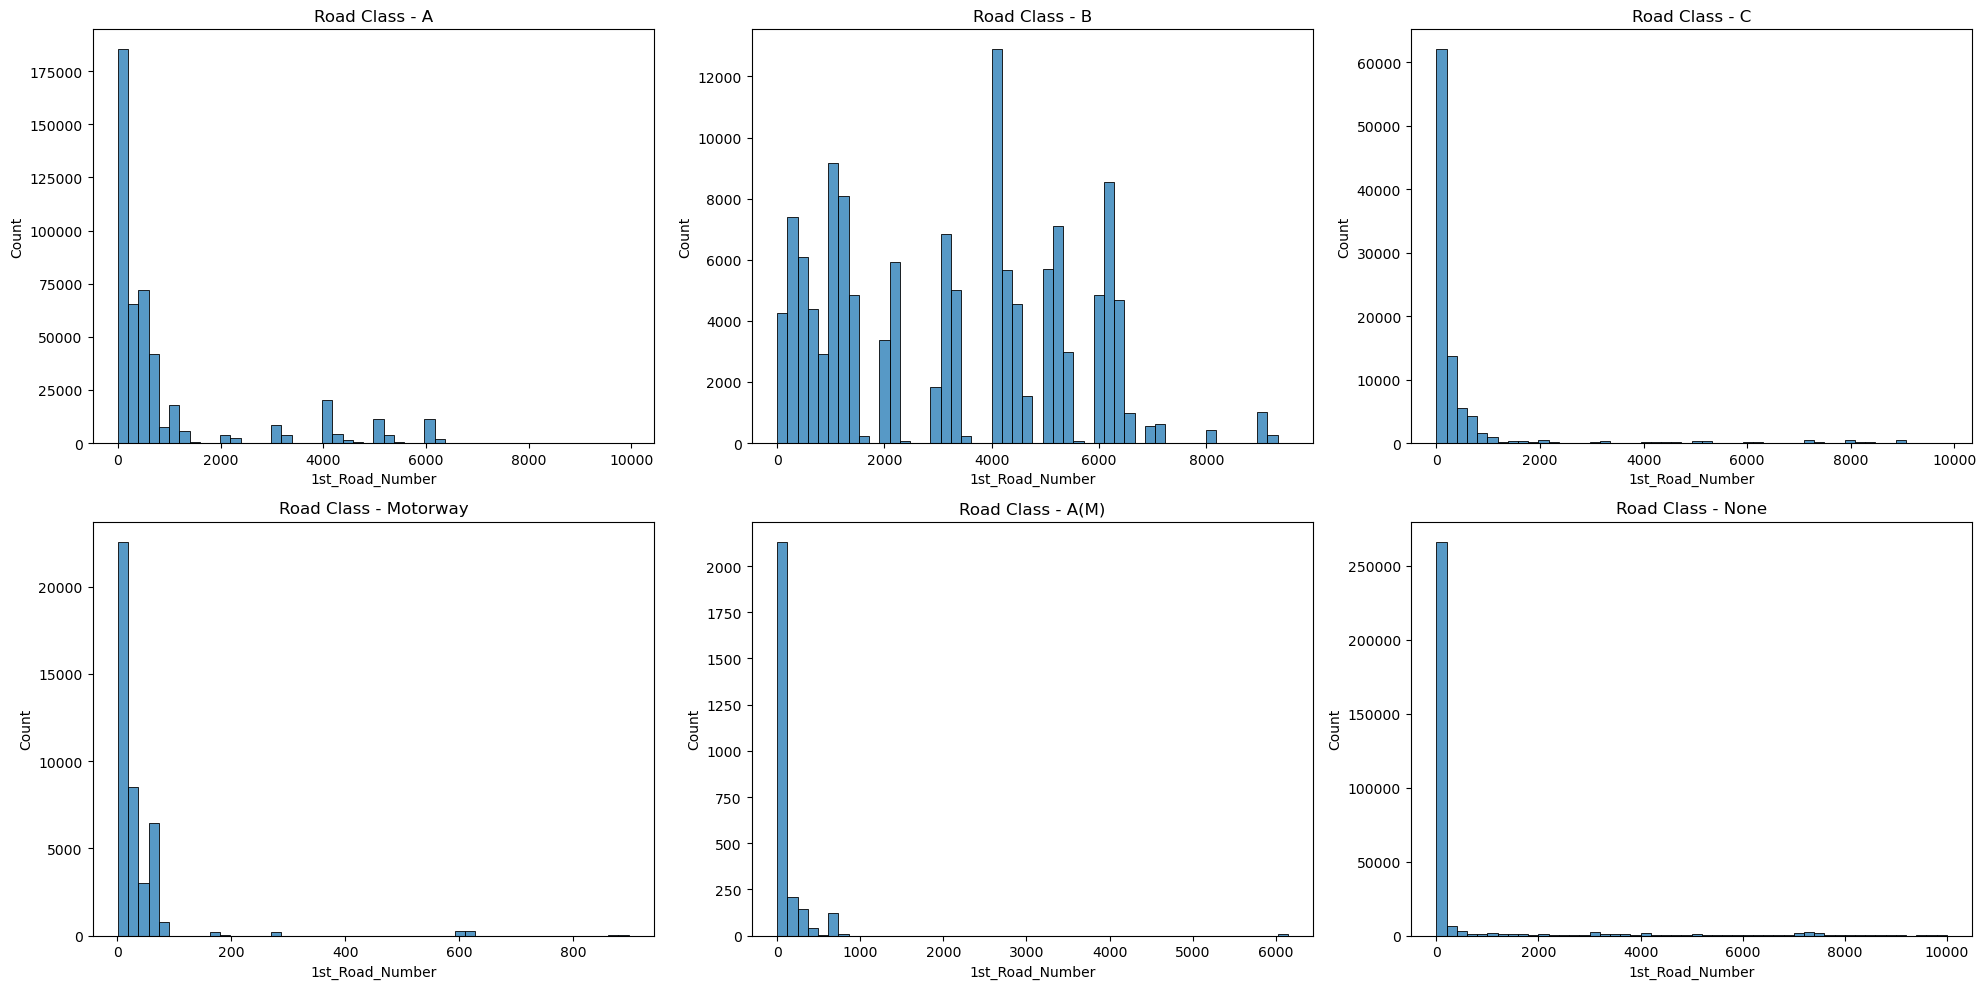

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

plot_road_class(df_accident[df_accident["1st_Road_Class"] == "A"]["1st_Road_Number"], ax[0], "A")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "B"]["1st_Road_Number"], ax[1], "B")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "C"]["1st_Road_Number"], ax[2], "C")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "Motorway"]["1st_Road_Number"], ax[3], "Motorway")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "A(M)"]["1st_Road_Number"], ax[4], "A(M)")
plot_road_class(df_accident[df_accident["1st_Road_Class"].isna()]["1st_Road_Number"], ax[5], "None")

plt.tight_layout()

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Most values are 0 for all classes (A, B, C, Motorway, A(M), None)
- In real-world situations, it's not possible the road numbers are 0 for all classes
- This `1st_Road_Number` feature should be dropped as the inputs may be wrong

[⬆️TOP⬆️](#top)
<a id="2nd_road"></a>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: 2nd_Road_Class and 2nd_Road_Number
</div>

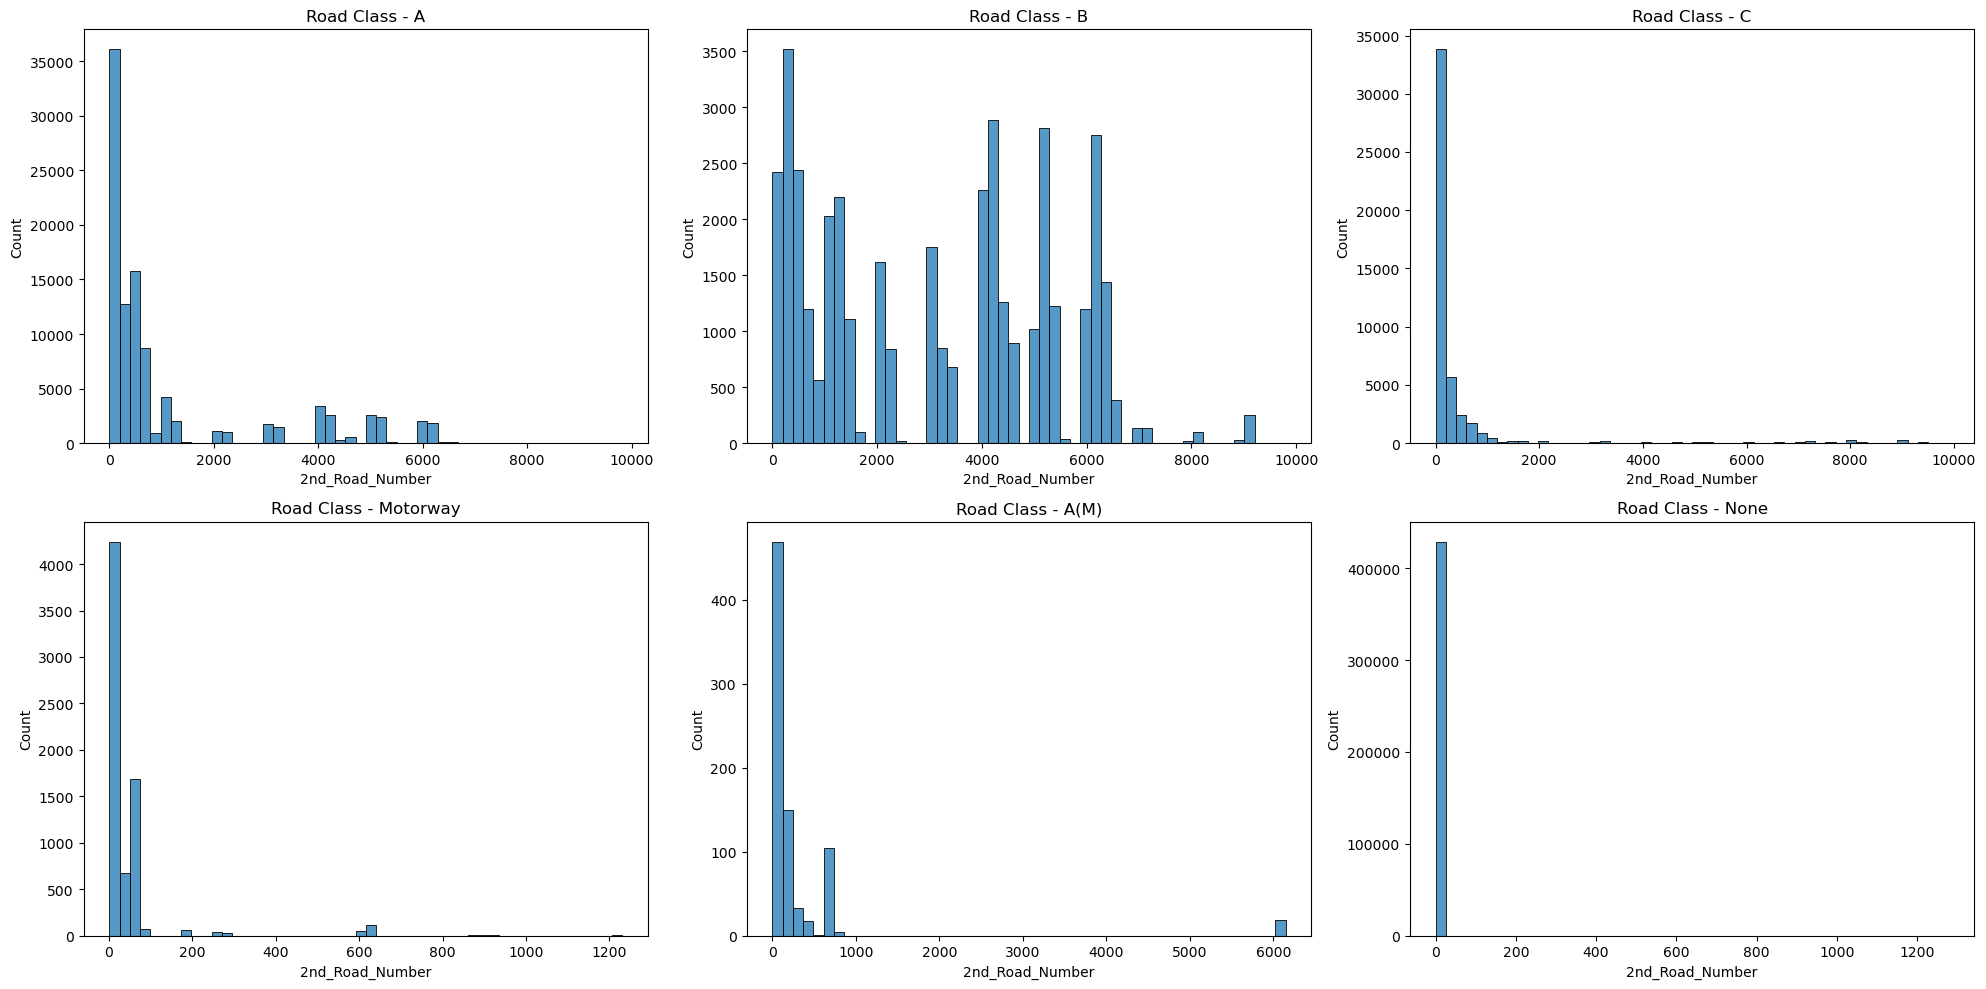

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "A"]["2nd_Road_Number"], ax[0], "A")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "B"]["2nd_Road_Number"], ax[1], "B")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "C"]["2nd_Road_Number"], ax[2], "C")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "Motorway"]["2nd_Road_Number"], ax[3], "Motorway")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "A(M)"]["2nd_Road_Number"], ax[4], "A(M)")
plot_road_class(df_accident[df_accident["2nd_Road_Class"].isna()]["2nd_Road_Number"], ax[5], "None")

plt.tight_layout()

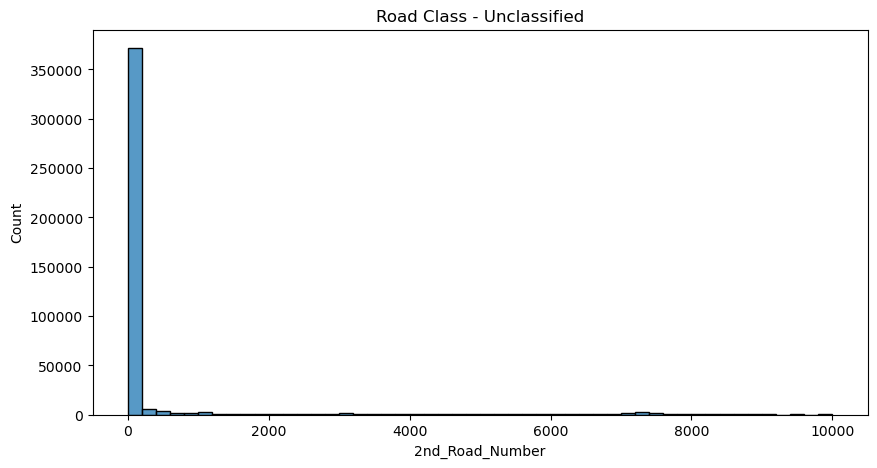

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "Unclassified"]["2nd_Road_Number"], ax, "Unclassified")

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Most values are 0 for all classes (A, B, C, Motorway, A(M), None, Unclassified)
- In real-world situations, it's not possible the road numbers are 0 for all classes
- This `2nd_Road_Number` feature should be dropped as the inputs may be wrong

In [12]:
df_accident[["1st_Road_Number", "2nd_Road_Number"]].describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.0,1011.997007,1832.041637,0.0,0.0,125.0,706.0,9999.0
2nd_Road_Number,1037772.0,387.000433,1316.672921,0.0,0.0,0.0,0.0,9999.0


[⬆️TOP⬆️](#top)
<a id="carriageway_hazards"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Carriageway_Hazards
</div>

In [13]:
print(f"Unique Values in {CBLUEBG} Carriageway_Hazards {CEND}: {df_accident['Carriageway_Hazards'].nunique()}, \n{df_accident['Carriageway_Hazards'].unique()}")

NameError: name 'CBLUEBG' is not defined

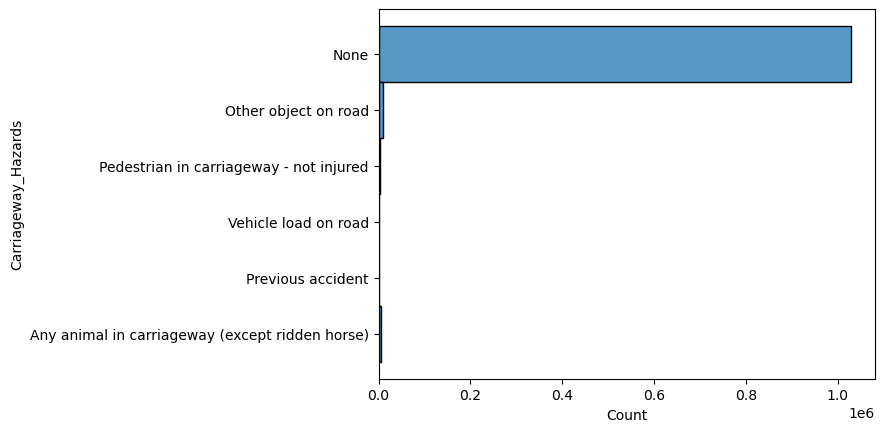

In [ ]:
sns.histplot(y=df_accident["Carriageway_Hazards"], bins=50);

#### Checking if the values are `None` or missing

In [ ]:
print(f"{CYELLOWBG2}Missing values{CEND}: {df_accident['Carriageway_Hazards'].isna().sum()}")

Missing values: 29


In [ ]:
df_accident[df_accident["Carriageway_Hazards"] == "None"].head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No


In [ ]:
df_accident[df_accident["Carriageway_Hazards"].isna()].head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
11984,200501MM79111,B,219.0,Unclassified,0.0,Slight,None,17/12/2005,Saturday,3.0,Give way or uncontrolled,T or staggered junction,51.449266,Darkness - lights lit,Southwark,Southwark,533990.0,174020.0,-0.073146,E01003958,1,2,0.0,0.0,Metropolitan Police,None,Single carriageway,None,30,01:00,Urban,None,2005,No
25234,200501YR99065,None,0.0,None,0.0,Slight,None,12/12/2005,Monday,3.0,Data missing or out of range,Not at junction or within 20 metres,51.595956,Darkness - lights lit,Haringey,Haringey,529240.0,190220.0,-0.135526,E01001966,2,2,0.0,0.0,Metropolitan Police,None,Single carriageway,None,30,19:00,Urban,None,2005,No
26704,200501ZT80452,A,237.0,None,0.0,Slight,None,14/10/2005,Friday,3.0,Data missing or out of range,Not at junction or within 20 metres,51.378278,Darkness - lights lit,Sutton,Sutton,528510.0,165980.0,-0.154876,E01004188,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,02:45,Urban,Fine no high winds,2005,No


<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Most values are `None` which means most of the time there were no carriageway hazards on the road
- Both missing values and `None` labelled values are interpreted by pandas as `None` values.

👉 Filling the missing values (29) with mode (`None`)

In [ ]:
statistics.mode(df_accident["Carriageway_Hazards"])

'None'

In [ ]:
df = df_accident.copy()

In [ ]:
df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Day,Month,Season
0,200501BS00001,A,3218.0,None,0.0,Serious,None,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No,4,1,Winter
1,200501BS00002,B,450.0,C,0.0,Slight,None,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,5,1,Winter
2,200501BS00003,C,0.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,6,1,Winter
3,200501BS00004,A,3220.0,None,0.0,Slight,None,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,7,1,Winter
4,200501BS00005,None,0.0,None,0.0,Slight,None,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,10,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,A,95.0,None,0.0,Slight,None,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,57.374005,Daylight,Highland,Highland,311830.0,832450.0,-3.467828,None,2,1,0.0,0.0,Northern,Dry,Single carriageway,None,60,07:00,Rural,Fine no high winds,2010,Yes,18,2,Winter
1048571,201091NM01881,A,95.0,None,0.0,Slight,None,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,57.232273,Darkness - no lighting,Highland,Highland,290880.0,817170.0,-3.809281,None,1,1,0.0,0.0,Northern,Frost or ice,Single carriageway,None,60,03:00,Rural,Fine no high winds,2010,Yes,21,2,Winter
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,None,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.585044,Daylight,Highland,Highland,288730.0,856520.0,-3.862727,None,1,3,0.0,0.0,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes,23,2,Winter
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,None,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.214898,Darkness - no lighting,Highland,Highland,289940.0,815260.0,-3.823997,None,1,2,0.0,0.0,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes,23,2,Winter


In [ ]:
df["Carriageway_Hazards"].fillna("None", inplace=True)
df["Carriageway_Hazards"].isna().sum()

0

[⬆️TOP⬆️](#top)
<a id="date"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Date
</div>

In [ ]:
print(f"Data type of Date Column: {df_accident['Date'].dtype}")

Data type of Date Column: object


In [ ]:
df_accident["Date"].isna().sum()

0

In [ ]:
df_accident["Date"][:7]

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
5    11/01/2005
6    13/01/2005
Name: Date, dtype: object

### Task-1:

Converting `Date` column from Object to Datetime

In [ ]:
df["Date"] =  pd.to_datetime(df["Date"], format="%d/%m/%Y")
print(f"Data type of Date Column: {df['Date'].dtype}")

Data type of Date Column: datetime64[ns]


In [ ]:
df.shape

(1048575, 34)

### Task-2:

Adding extra 2 features to the dataset (Day and Month)

In [ ]:
df["Day"] = df["Date"].apply(lambda x:x.day)
df["Month"] = df["Date"].apply(lambda x:x.month)
df.drop("Date", axis=1, inplace=True)
df.shape

(1048575, 35)

### Graph-1

`Day` with `Accident_Severity`

In [ ]:
df['Day'].value_counts()

11    35606
1     35580
12    35406
10    35380
8     35240
19    35073
17    35054
9     35016
5     34956
15    34917
21    34917
18    34746
13    34691
7     34673
23    34648
16    34625
6     34612
20    34592
22    34558
14    34480
24    34456
2     34304
4     34126
3     34026
28    33437
27    33351
26    32992
25    32037
29    31522
30    30778
31    18776
Name: Day, dtype: int64

In [41]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident, x="Day", hue="Accident_Severity", palette="mako", alpha=1.0, bins=100);

ValueError: Could not interpret value `Day` for parameter `x`

<Figure size 2000x700 with 0 Axes>

**Observation:** `Fatal` data is too less to be seen in the graph

#### Graph-1.1

Different graph for `Fatal` case

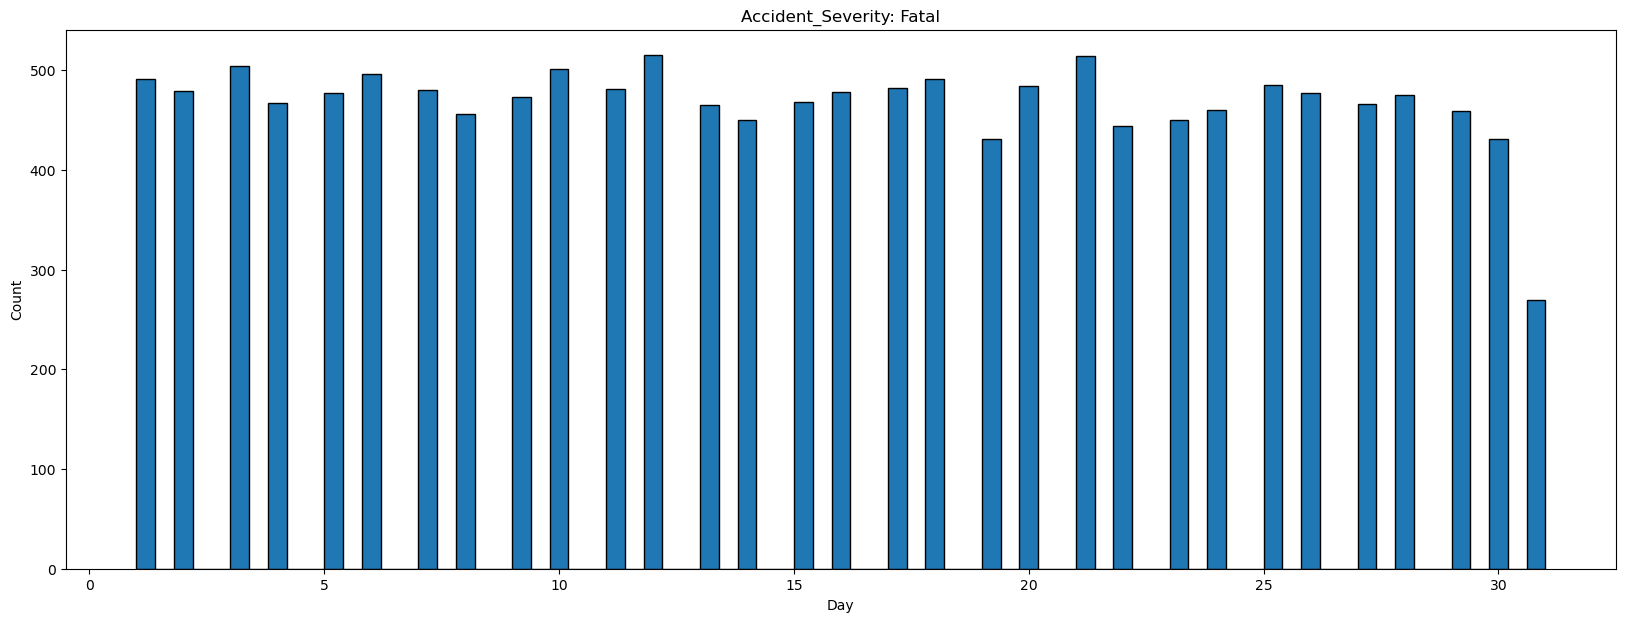

In [55]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Day", palette="coolwarm", alpha=1.0, bins=75).set(title=f"Accident_Severity: Fatal");

### Graph-2

`Month` with `Accident_Severity`

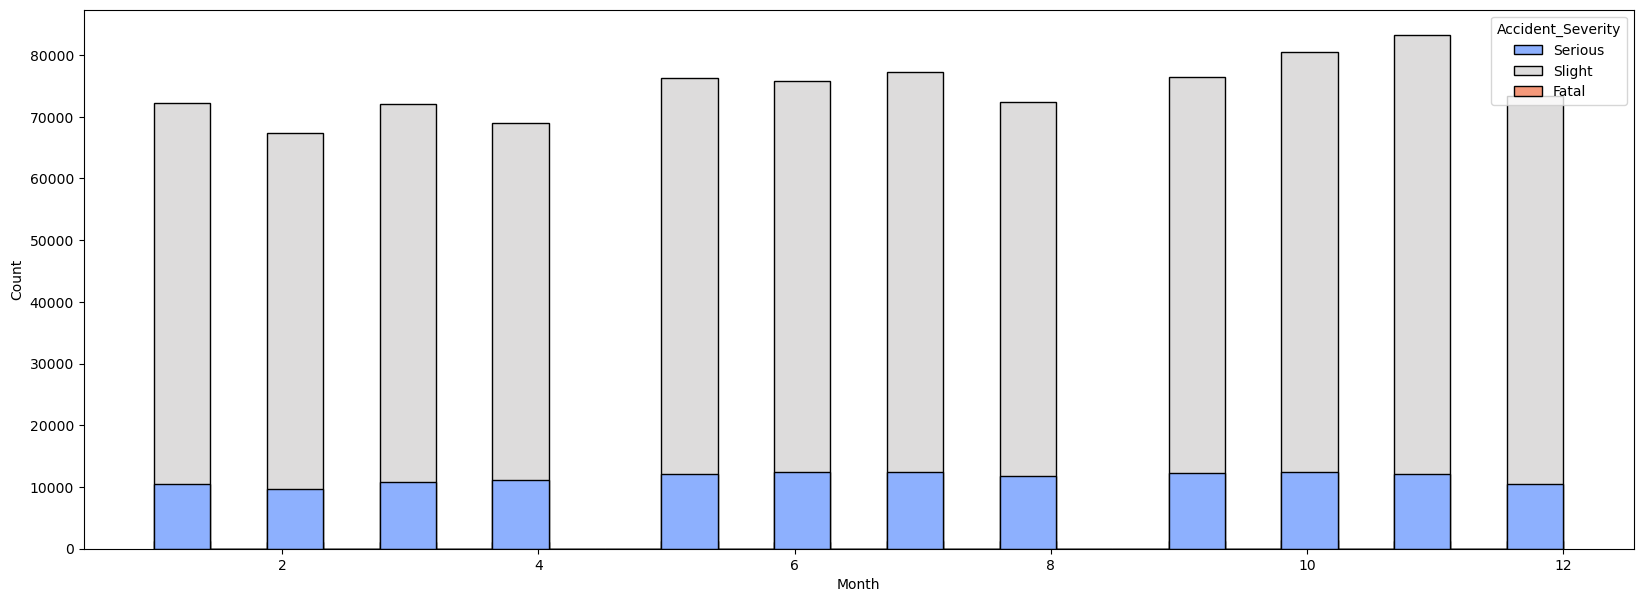

In [44]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident, x="Month", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=25);

**Observation:** `Fatal` data is too less to be seen in the graph

#### Graph-2.1

Different graph for `Fatal` case

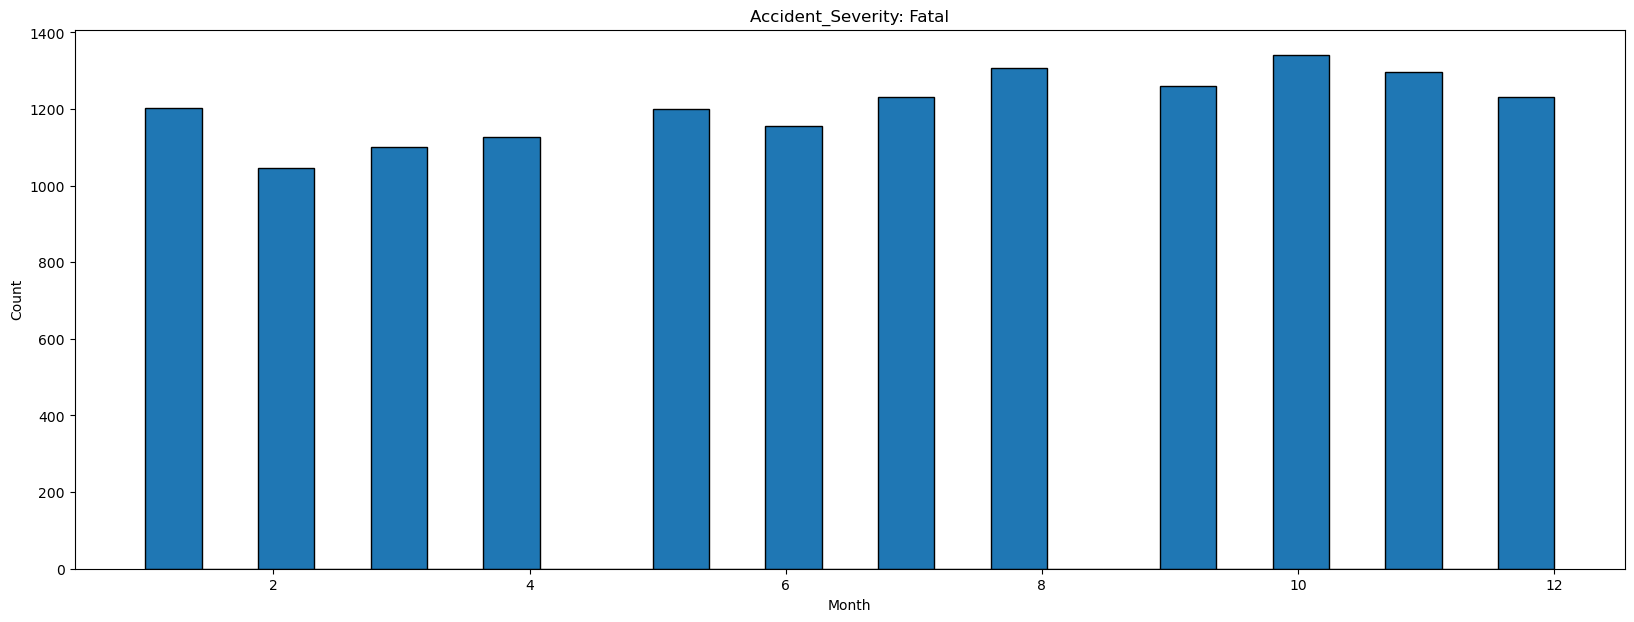

In [56]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Month", palette="coolwarm", alpha=1.0, bins=25).set(title=f"Accident_Severity: Fatal");

### Task-3: Get Seasonal Data from Months

- Spring (March, April, May)
- Summer (June, July, August)
- Autumn (September, October, November)
- Winter (December, January, February)

In [37]:
df["Season"] = df["Month"].map({3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer", 7: "Summer", 8: "Summer",
                                9: "Autumn", 10: "Autumn", 11: "Autumn", 12: "Winter", 1: "Winter", 2: "Winter"})
df.shape

(1048575, 36)

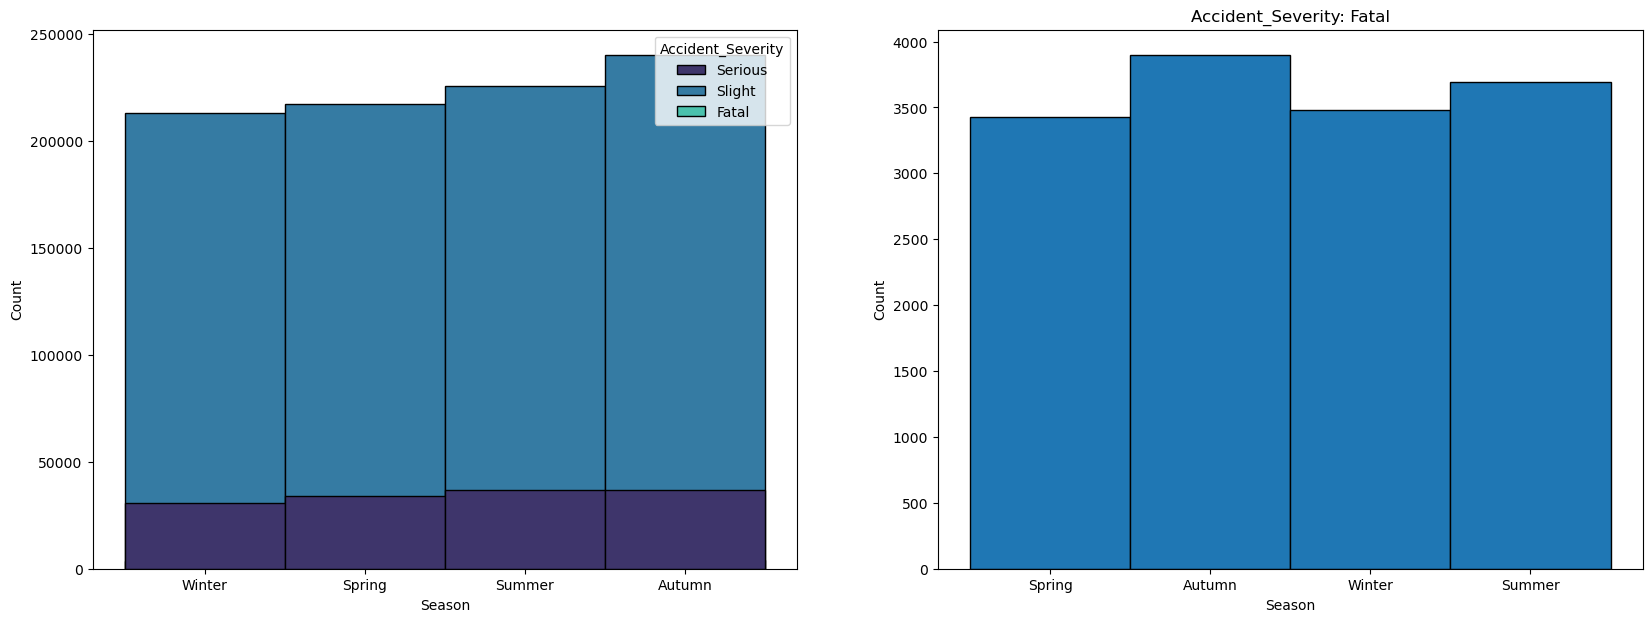

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Season", hue="Accident_Severity", palette="mako", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Season", palette="mako", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal");

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Autumn season has most number of accidents

[⬆️TOP⬆️](#top)
<a id="accident_severity"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Accident_Severity
</div>

In [19]:
df_accident["Accident_Severity"].isna().sum()

0

In [46]:
df_accident["Accident_Severity"].value_counts()

Slight     895883
Serious    138192
Fatal       14500
Name: Accident_Severity, dtype: int64

In [47]:
#percentage calculation
df_accident["Accident_Severity"].value_counts()/len(df_accident)*100

Slight     85.438142
Serious    13.179029
Fatal       1.382829
Name: Accident_Severity, dtype: float64

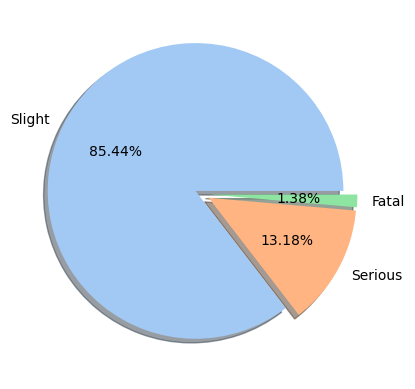

In [25]:
labels = ["Slight", "Serious", "Fatal"]
colors = sns.color_palette("pastel")
plt.pie(df_accident["Accident_Severity"].value_counts(), labels = labels, autopct="%.2f%%",
        shadow=True, colors=colors, explode=[0.05, 0.05, 0.05]);

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- `Fatal` case data is only 1.38%. So the model will be biased for `Slight` cases.

[⬆️TOP⬆️](#top)
<a id="day_of_week"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Day_of_Week
</div>

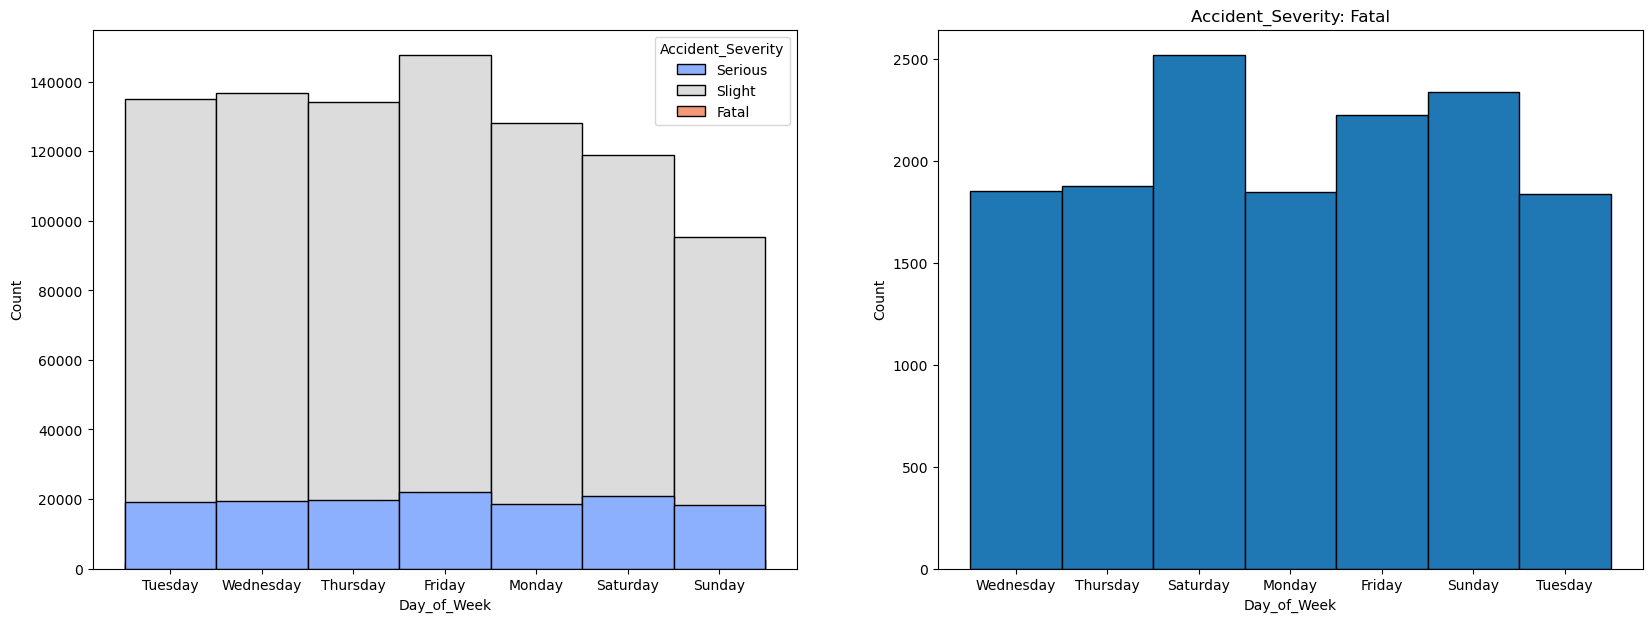

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df_accident, x="Day_of_Week", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Day_of_Week", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal");

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Weekends (Saturday and Sunday) have most fatal accidents

[⬆️TOP⬆️](#top)
<a id="time"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Time
</div>

In [31]:
df["Time"].isna().sum()

100

### Task-1: Converting `Time` feature from object to datetime

Extract hour from `Time` data

In [32]:
df["Time"] =  pd.to_datetime(df_accident["Time"], format="%H:%M")
df["Time"].dtype

dtype('<M8[ns]')

In [33]:
df["Hour"] = df["Time"].apply(lambda x:x.hour)
df.drop("Time", axis=1, inplace=True)
df.shape

(1048575, 36)

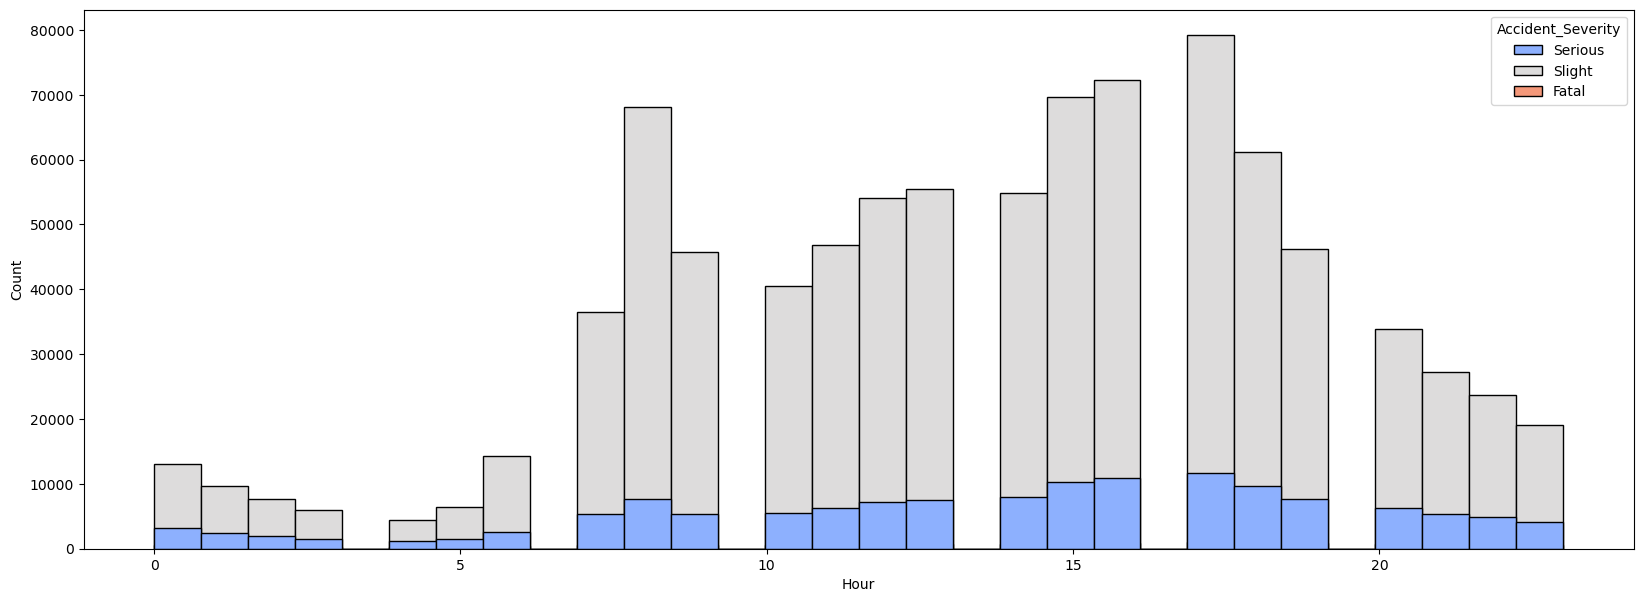

In [40]:
plt.figure(figsize=(20, 7))
sns.histplot(df, x="Hour", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=30);

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Peak hour for accidents: 7:00 - 19:00
- Most accident occurs when
    - Hour = 8:00
    - Hour = 15:00 - 18:00

[⬆️TOP⬆️](#top)
<a id="junction_control"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Junction_Control
</div>

In [42]:
print(f"Data type = {df['Junction_Control'].dtype}\nMissing Values = {df['Junction_Control'].isna().sum()}")

Data type = object
Missing Values = 0


In [43]:
df["Junction_Control"].nunique(), df["Junction_Control"].unique()

(7,
 array(['Data missing or out of range', 'Auto traffic signal',
        'Give way or uncontrolled', 'Stop sign', 'Authorised person',
        'Auto traffic sigl', 'Not at junction or within 20 metres'],
       dtype=object))

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

`Auto traffic signal` and `Auto traffic sigl` may be same just misspelled

In [49]:
df["Junction_Control"].value_counts()

Give way or uncontrolled               502984
Data missing or out of range           353871
Auto traffic signal                    105500
Not at junction or within 20 metres     76916
Stop sign                                7128
Authorised person                        1838
Auto traffic sigl                         338
Name: Junction_Control, dtype: int64

In [56]:
df["Junction_Control"] = df["Junction_Control"].map({"Auto traffic sigl": "Auto traffic signal"}).fillna(df["Junction_Control"])
df["Junction_Control"].nunique()

6

In [57]:
df["Junction_Control"].unique()

array(['Data missing or out of range', 'Auto traffic signal',
       'Give way or uncontrolled', 'Stop sign', 'Authorised person',
       'Not at junction or within 20 metres'], dtype=object)

In [58]:
df["Junction_Control"].value_counts()

Give way or uncontrolled               502984
Data missing or out of range           353871
Auto traffic signal                    105838
Not at junction or within 20 metres     76916
Stop sign                                7128
Authorised person                        1838
Name: Junction_Control, dtype: int64

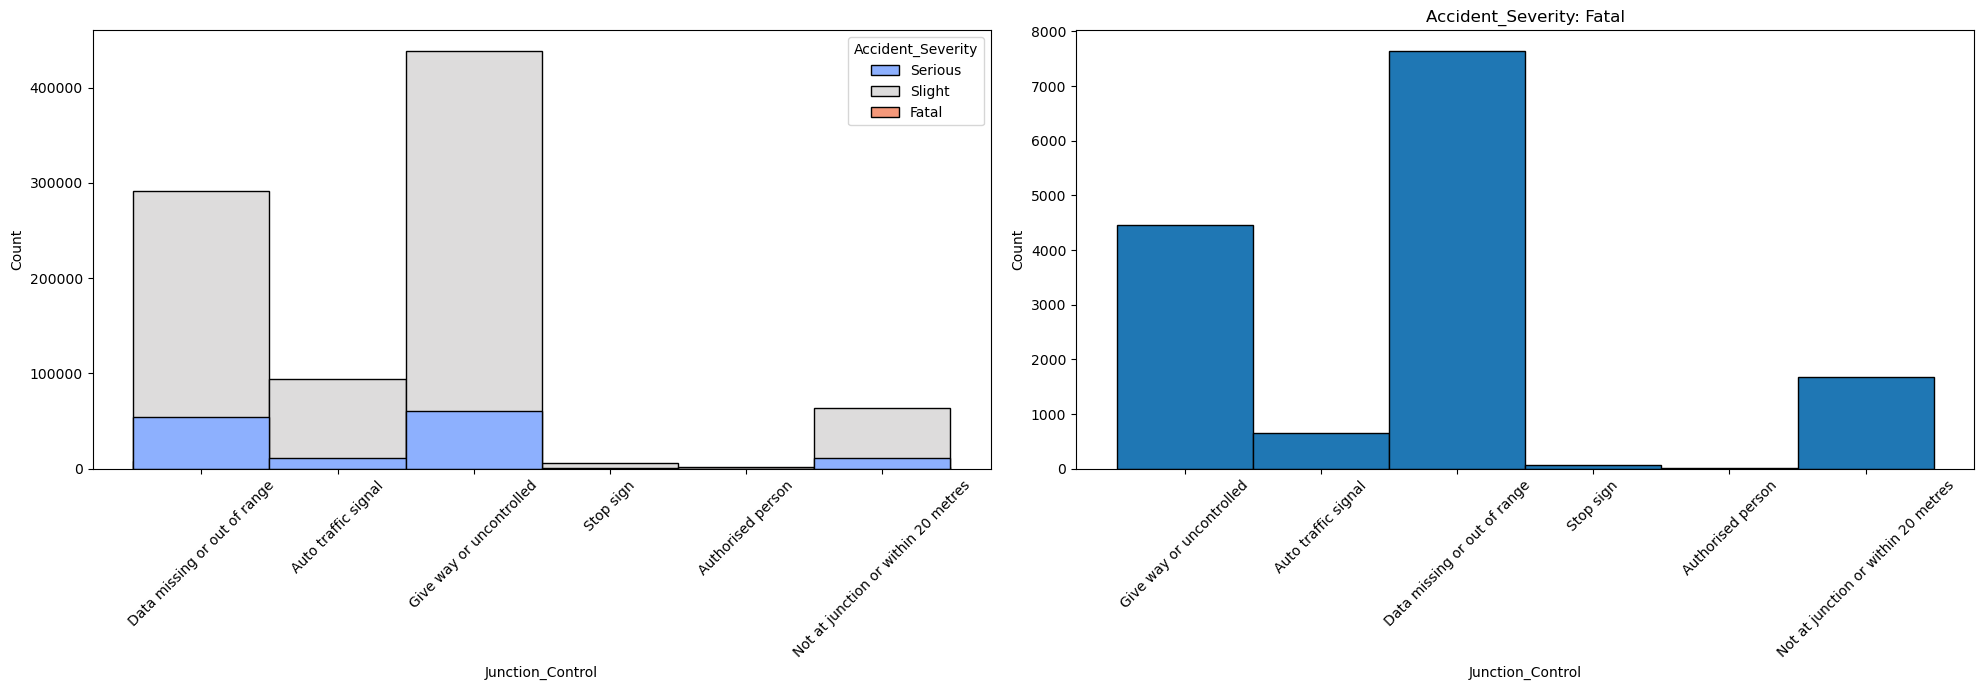

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Junction_Control", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Junction_Control", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
ax[0].tick_params(axis="x", rotation=45)
ax[1].tick_params(axis="x", rotation=45)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- It's obvious that most accident occurs when **junction is uncontrolled**
- There is a value `Data missing or out of range` in this feature. `df.isna().sum()` didn't show these as missing values but these are actually missing values. So they are also needed to be treated as others missing value

[⬆️TOP⬆️](#top)
<a id="junction_detail"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Junction_Detail
</div>

In [60]:
print(f"Data type = {df['Junction_Detail'].dtype}\nMissing Values = {df['Junction_Detail'].isna().sum()}")

Data type = object
Missing Values = 0


In [61]:
df["Junction_Detail"].nunique(), df["Junction_Detail"].unique()

(10,
 array(['Not at junction or within 20 metres', 'Crossroads',
        'T or staggered junction', 'Mini-roundabout', 'Other junction',
        'More than 4 arms (not roundabout)', 'Private drive or entrance',
        'Roundabout', 'Slip road', 'Data missing or out of range'],
       dtype=object))

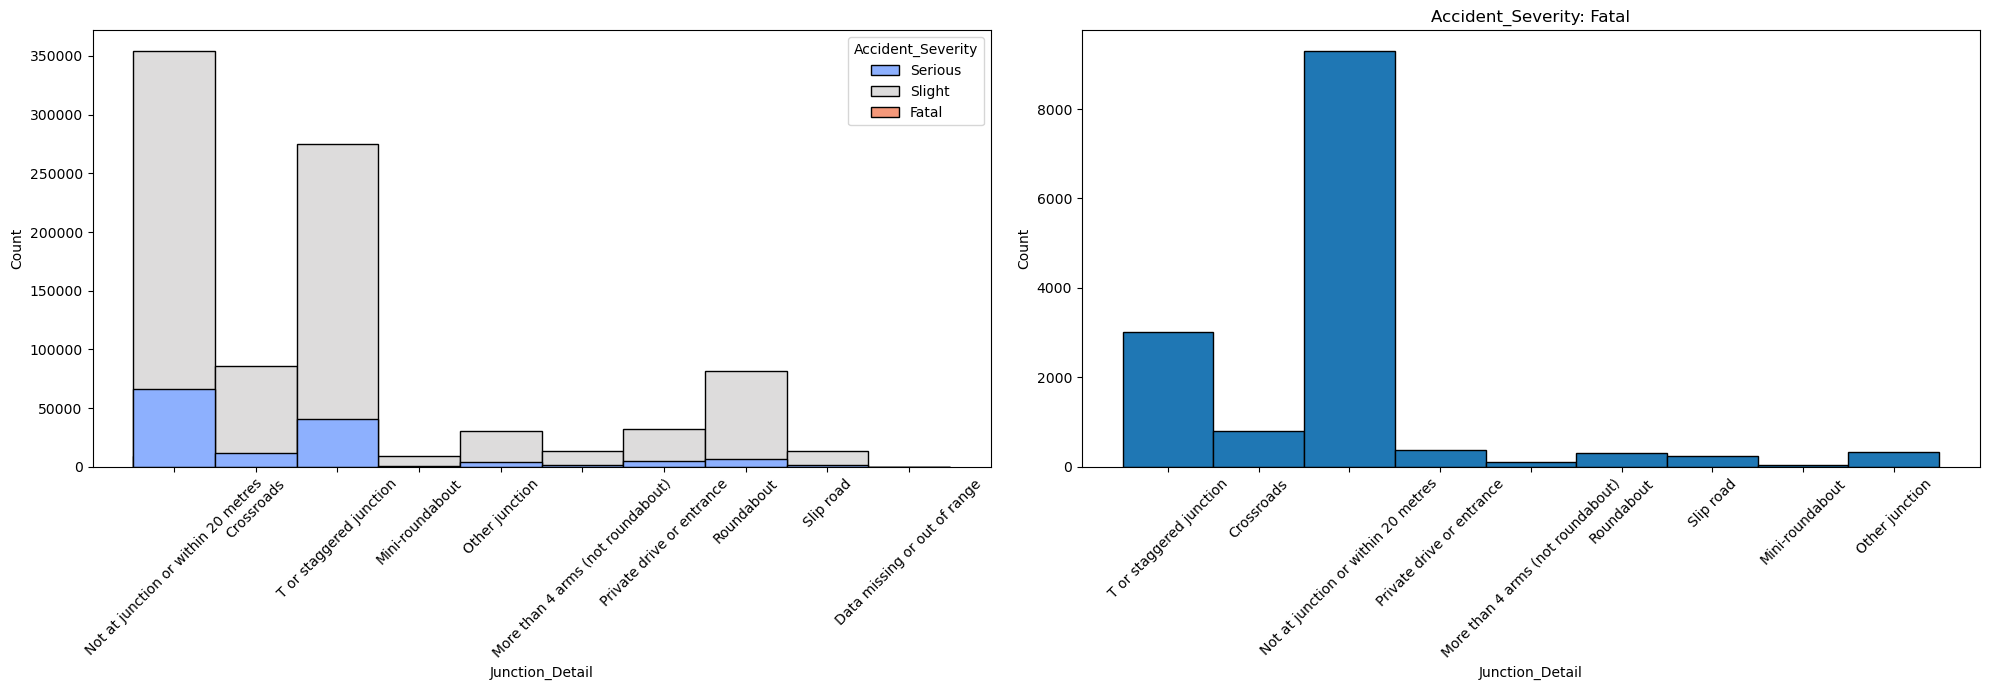

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Junction_Detail", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Junction_Detail", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
ax[0].tick_params(axis="x", rotation=45)
ax[1].tick_params(axis="x", rotation=45)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- It's obvious that most accident occurs `Not at junction or within 20 metres` which is contradictory with `Junction_Control` feature.
- There is a value `Data missing or out of range` in this feature. `df.isna().sum()` didn't show these as missing values but these are actually missing values. So they are also needed to be treated as others missing value
- The missing values for `Junction_Control` can be filled from `Junction_Detail` values and keep only `Junction_Control` feature.

In [67]:
df[df["Junction_Detail"] == "Not at junction or within 20 metres"]["Junction_Control"][:5]

0    Data missing or out of range
2    Data missing or out of range
3    Data missing or out of range
4    Data missing or out of range
5    Data missing or out of range
Name: Junction_Control, dtype: object

[⬆️TOP⬆️](#top)
<a id="light_conditions"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Light_Conditions
</div>

In [68]:
print(f"Data type = {df['Light_Conditions'].dtype}\nMissing Values = {df['Light_Conditions'].isna().sum()}")

Data type = object
Missing Values = 2084


In [69]:
df["Light_Conditions"].nunique(), df["Light_Conditions"].unique()

(5,
 array([None, 'Darkness - lights lit', 'Darkness - lighting unknown',
        'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight'],
       dtype=object))

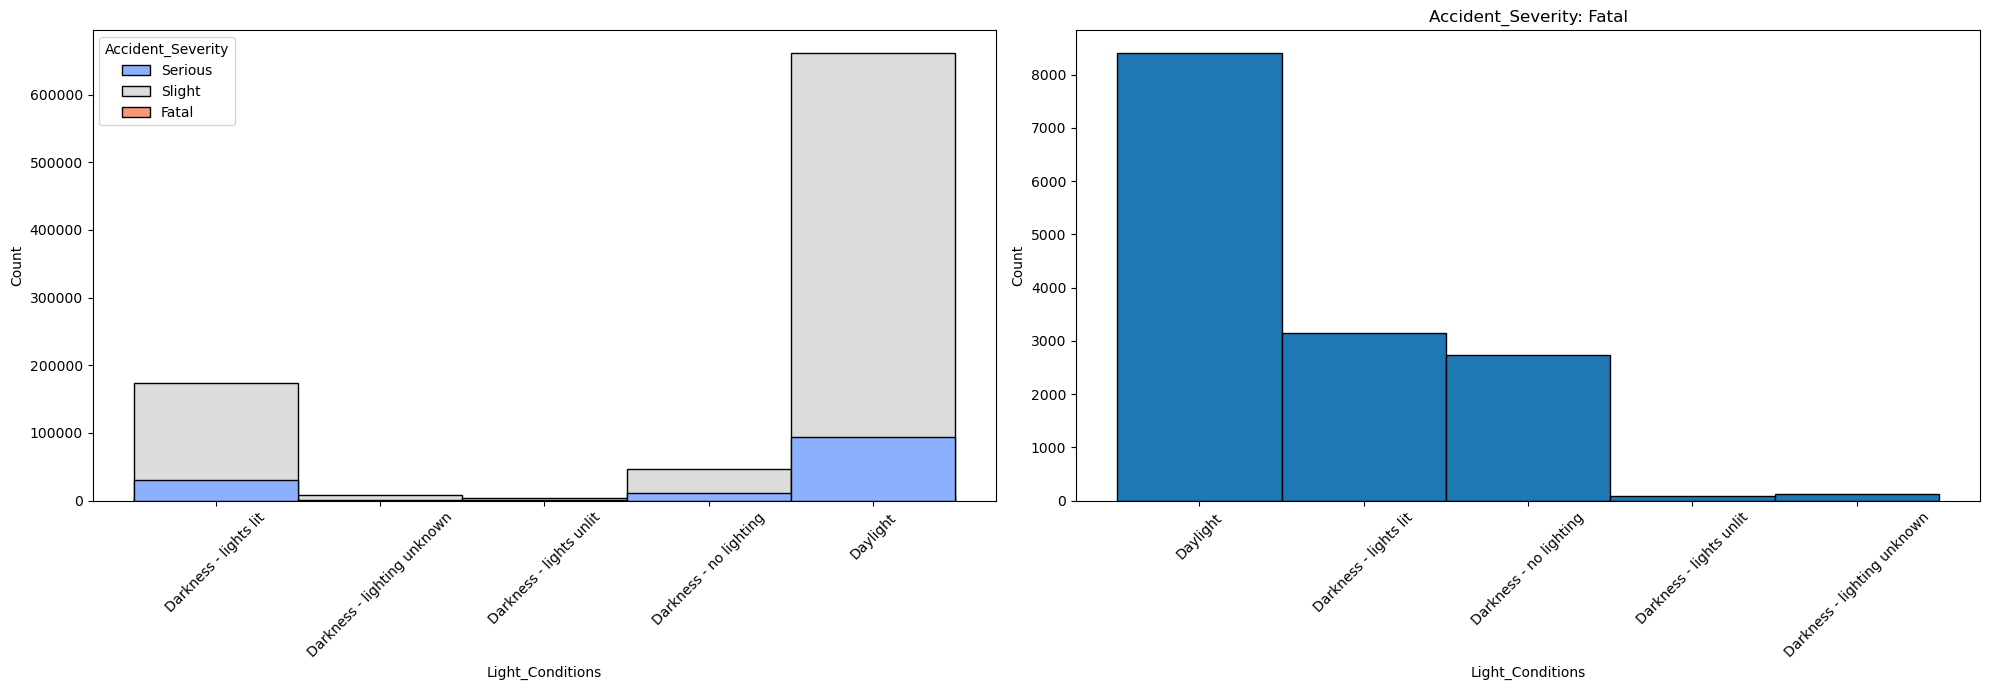

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Light_Conditions", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Light_Conditions", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
ax[0].tick_params(axis="x", rotation=45)
ax[1].tick_params(axis="x", rotation=45)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- `Darkness - lights unlit` can be considered as `Darkness - no lighting` for simplicity
- Most accidents occurs at `Daylight`. The possibilities can be
    - Drivers reamin careful at night for darkness
    - Rush hours (going to the office) are normally at daylight

[⬆️TOP⬆️](#top)
<a id="weather_conditions"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Weather_Conditions
</div>

In [72]:
print(f"Data type = {df['Weather_Conditions'].dtype}\nMissing Values = {df['Weather_Conditions'].isna().sum()}")

Data type = object
Missing Values = 21392


In [73]:
df["Weather_Conditions"].nunique(), df["Weather_Conditions"].unique()

(8,
 array(['Raining no high winds', 'Fine no high winds', None,
        'Snowing no high winds', 'Other', 'Fine + high winds',
        'Raining + high winds', 'Fog or mist', 'Snowing + high winds'],
       dtype=object))

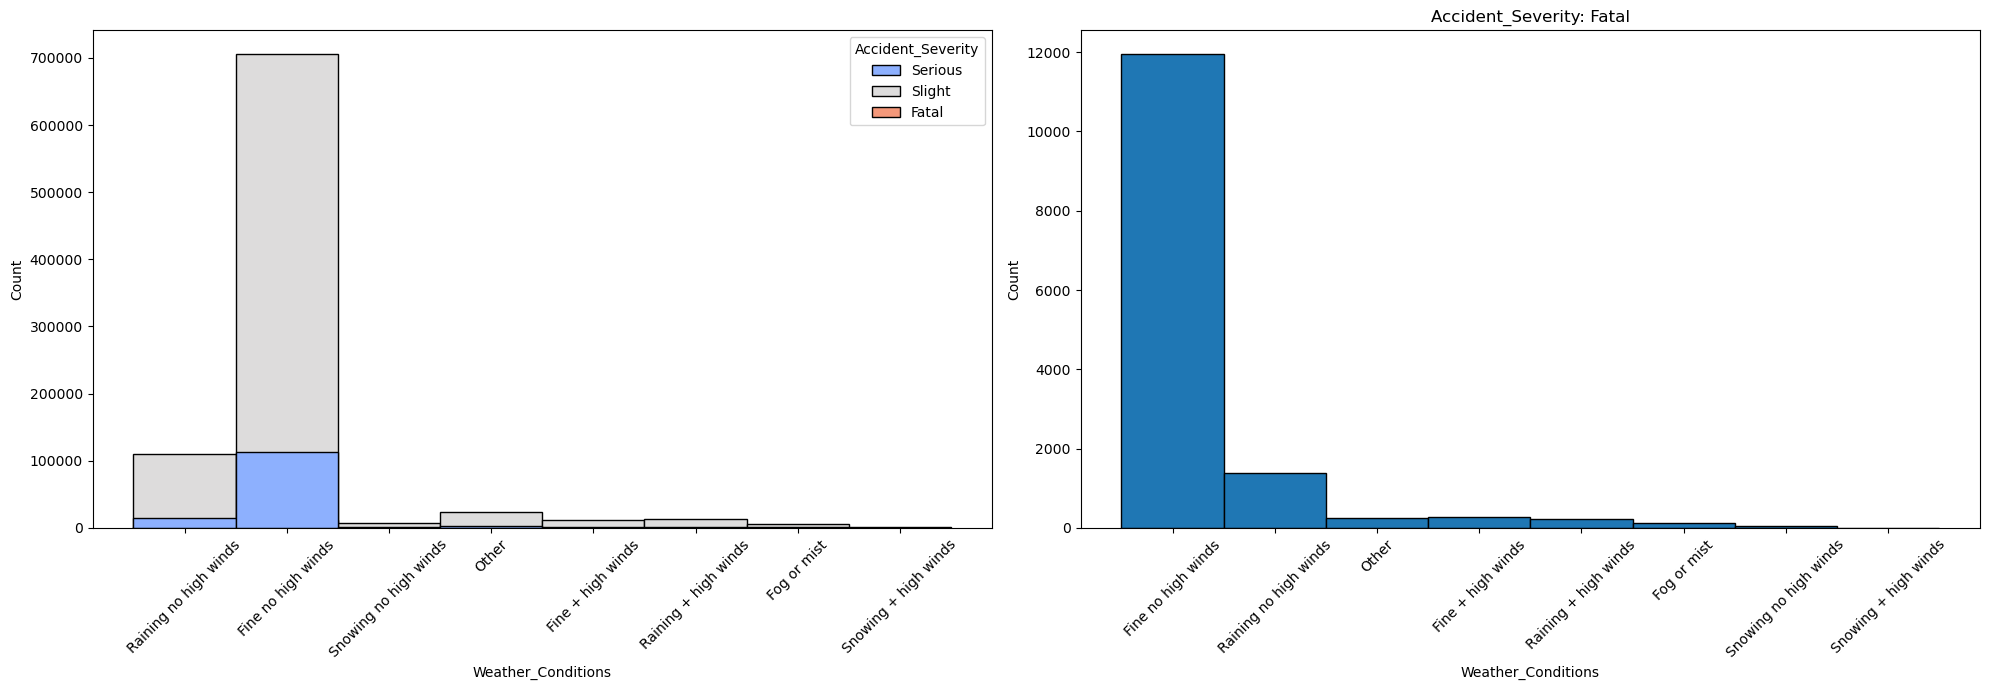

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Weather_Conditions", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Weather_Conditions", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
ax[0].tick_params(axis="x", rotation=45)
ax[1].tick_params(axis="x", rotation=45)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Most accidents occurs at `Fine no high winds`.

[⬆️TOP⬆️](#top)
<a id="casualties"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Number_of_Casualties
</div>

In [75]:
print(f"Data type = {df['Number_of_Casualties'].dtype}\nMissing Values = {df['Number_of_Casualties'].isna().sum()}")

Data type = int64
Missing Values = 0


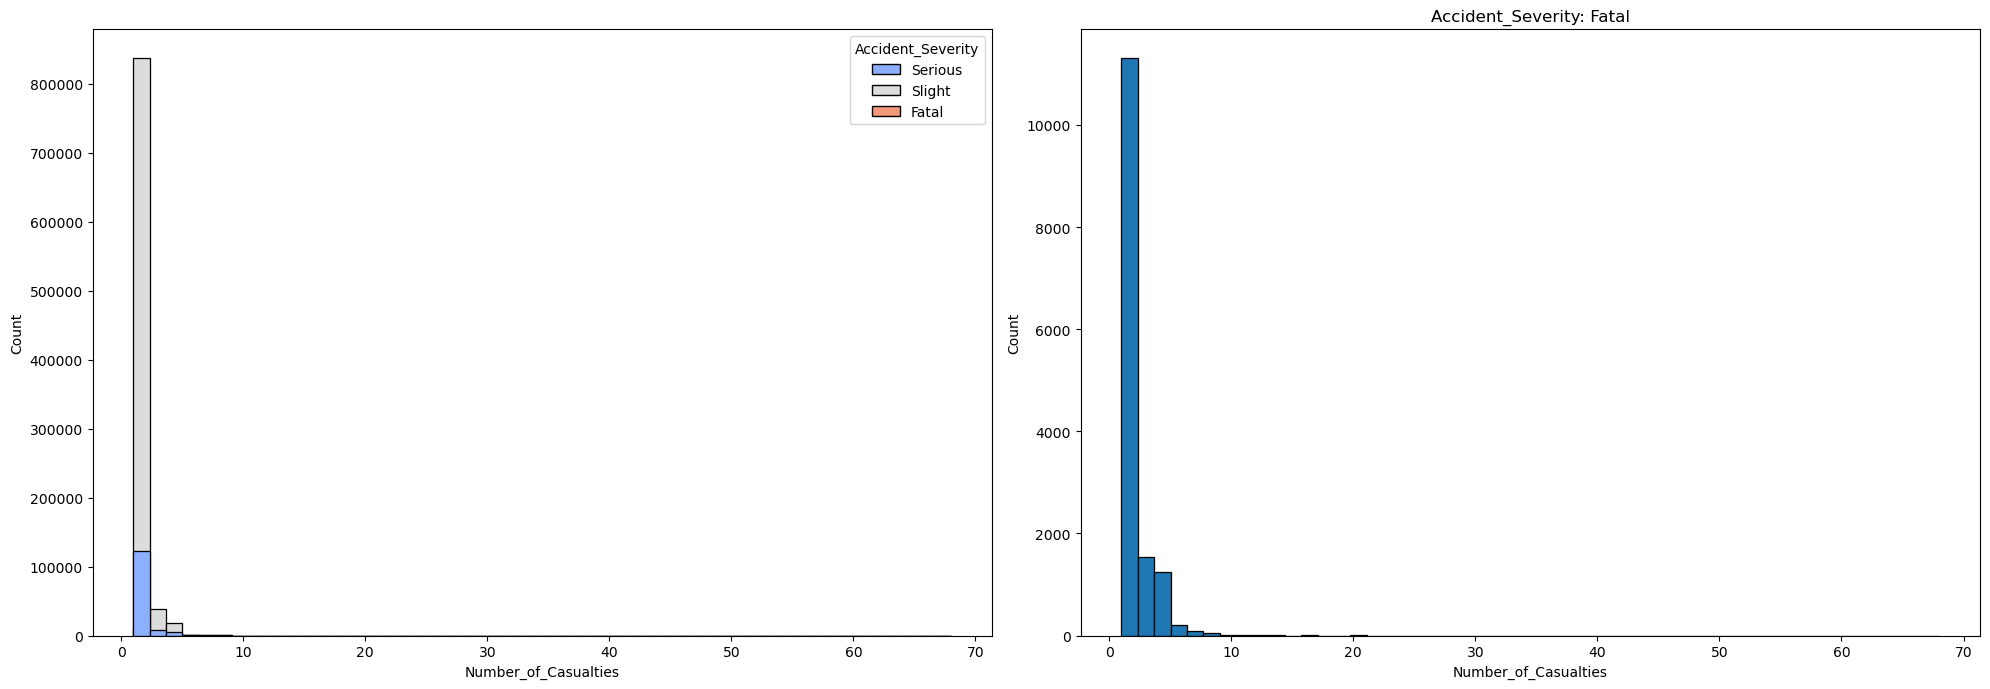

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Number_of_Casualties", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Number_of_Casualties", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
plt.tight_layout();

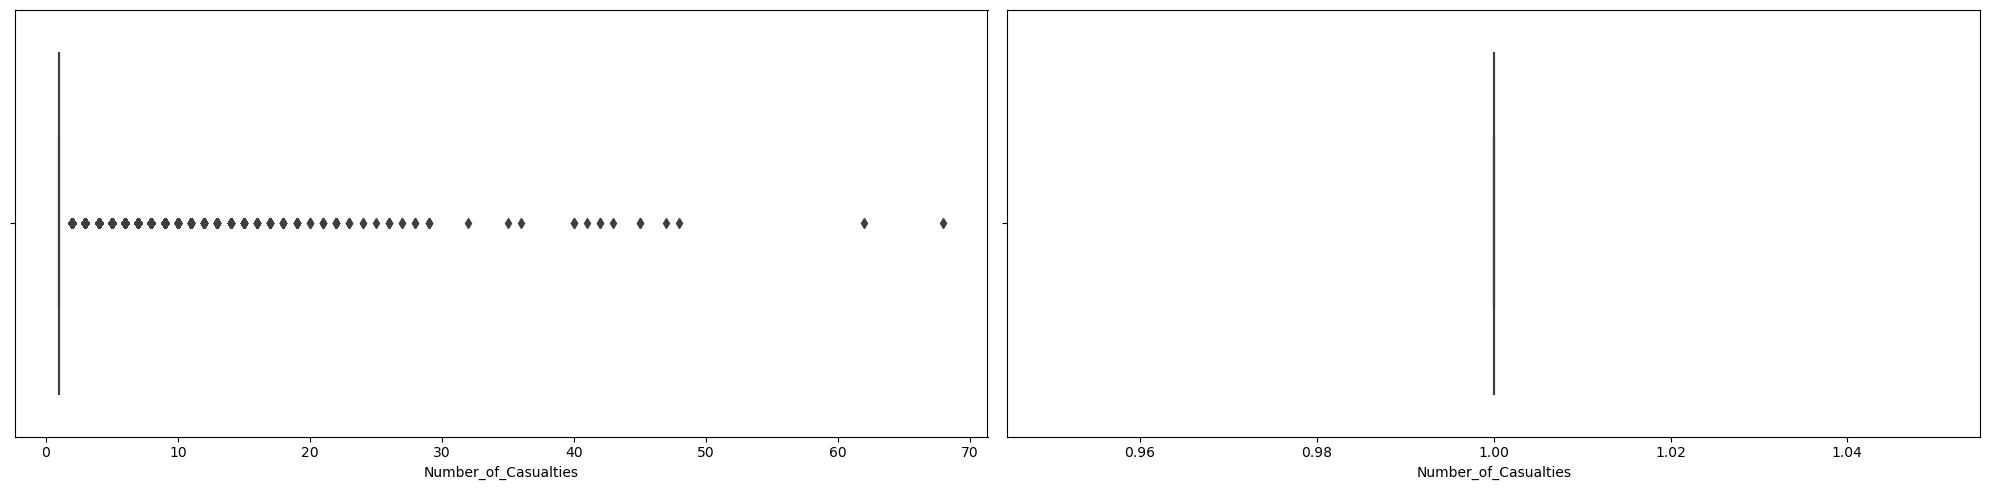

In [77]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df["Number_of_Casualties"], ax=ax[0])
sns.boxplot(x=df["Number_of_Casualties"], ax=ax[1], showfliers=False)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- (histogram) Most accidents ➡️ single casualty
- (boxplot) there were very few incidents when lots of casualties happened. It's best to not consider them as outliers because it can be happened 🤔

[⬆️TOP⬆️](#top)
<a id="vehicles"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Number_of_Vehicles
</div>

In [78]:
print(f"Data type = {df['Number_of_Vehicles'].dtype}\nMissing Values = {df['Number_of_Vehicles'].isna().sum()}")

Data type = int64
Missing Values = 0


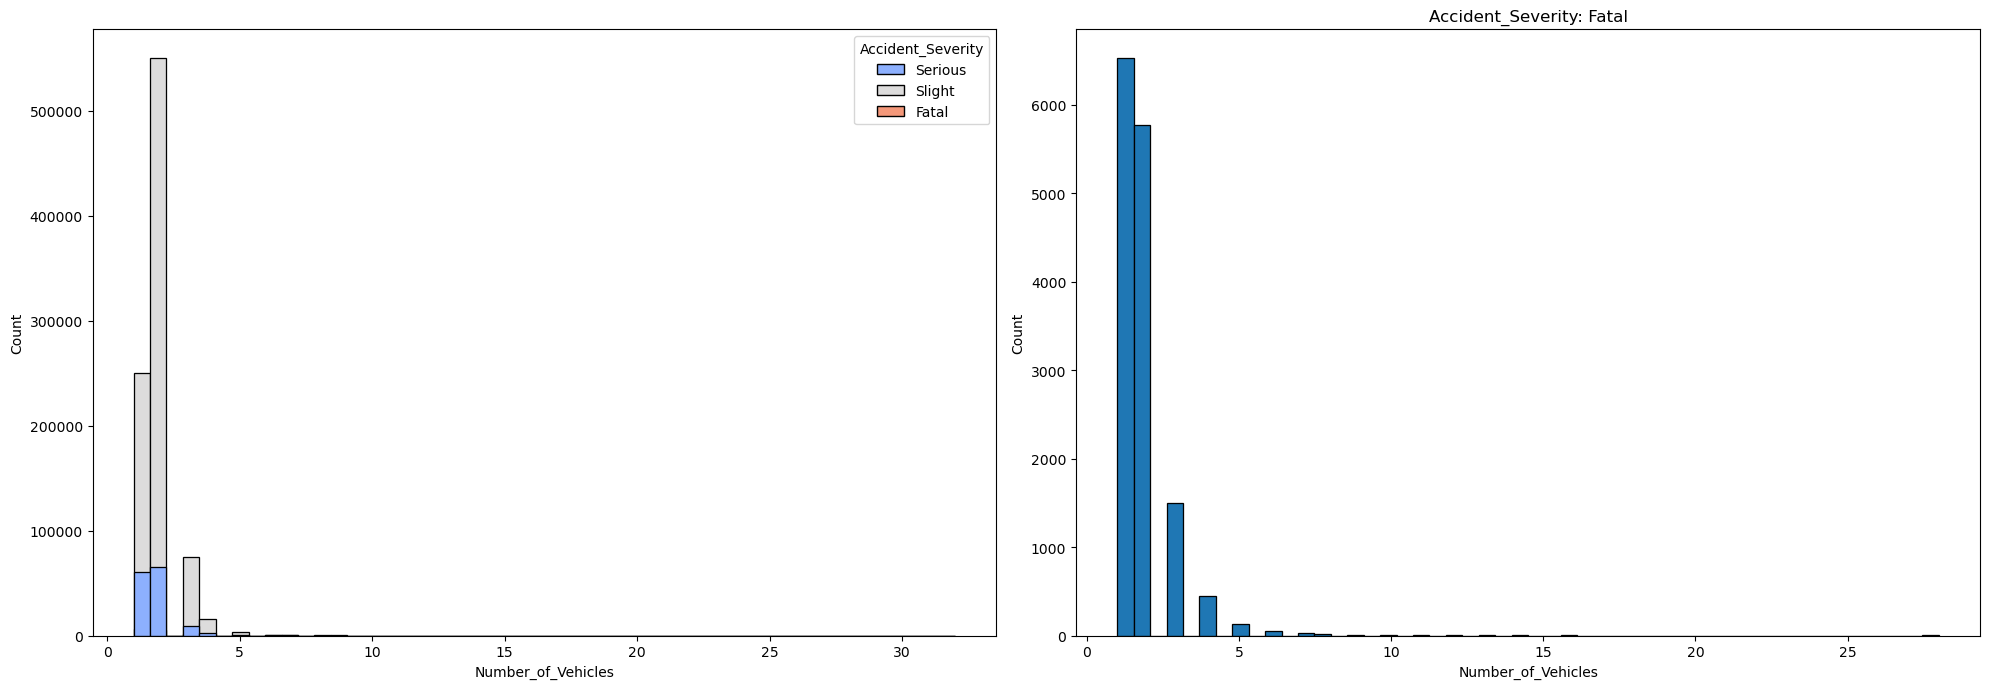

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Number_of_Vehicles", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Number_of_Vehicles", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
plt.tight_layout();

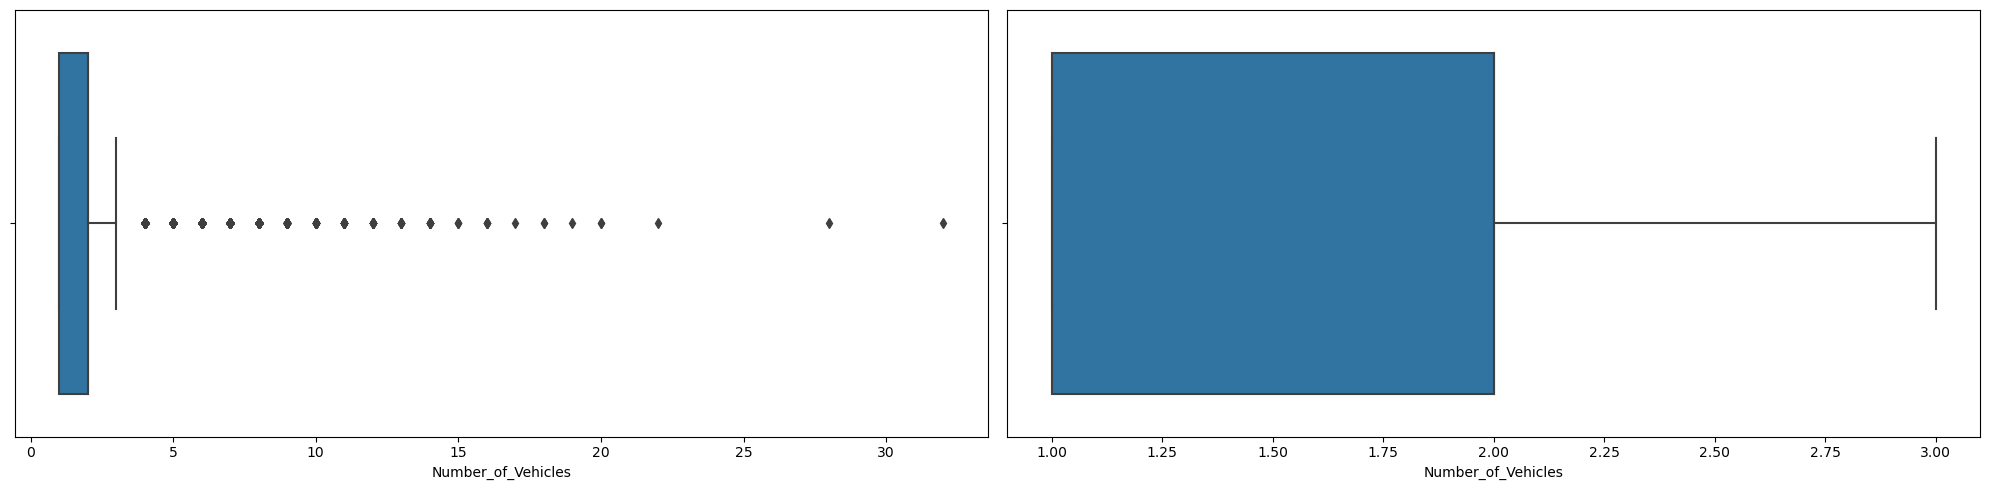

In [80]:
fig, ax = plt.subplots(ncols = 2, figsize=(20, 5))

sns.boxplot(x=df["Number_of_Vehicles"], ax=ax[0])
sns.boxplot(x=df["Number_of_Vehicles"], ax=ax[1], showfliers=False)
plt.tight_layout();

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- (histogram) Most accidents ➡️ 2 vehicles but Fatal accidents happened when single vehicle involved 🚗
- (boxplot) there were very few incidents when lots of casualties happened. It's best to not consider them as outliers because it can be happened 🤔

[⬆️TOP⬆️](#top)
<a id="road_type"></a>

<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Road_Type
</div>

In [81]:
print(f"Data type = {df['Road_Type'].dtype}\nMissing Values = {df['Road_Type'].isna().sum()}")

Data type = object
Missing Values = 7266


In [82]:
df["Road_Type"].nunique(), df["Road_Type"].unique()

(5,
 array(['Single carriageway', 'Dual carriageway', 'One way street',
        'Roundabout', 'Slip road', None], dtype=object))

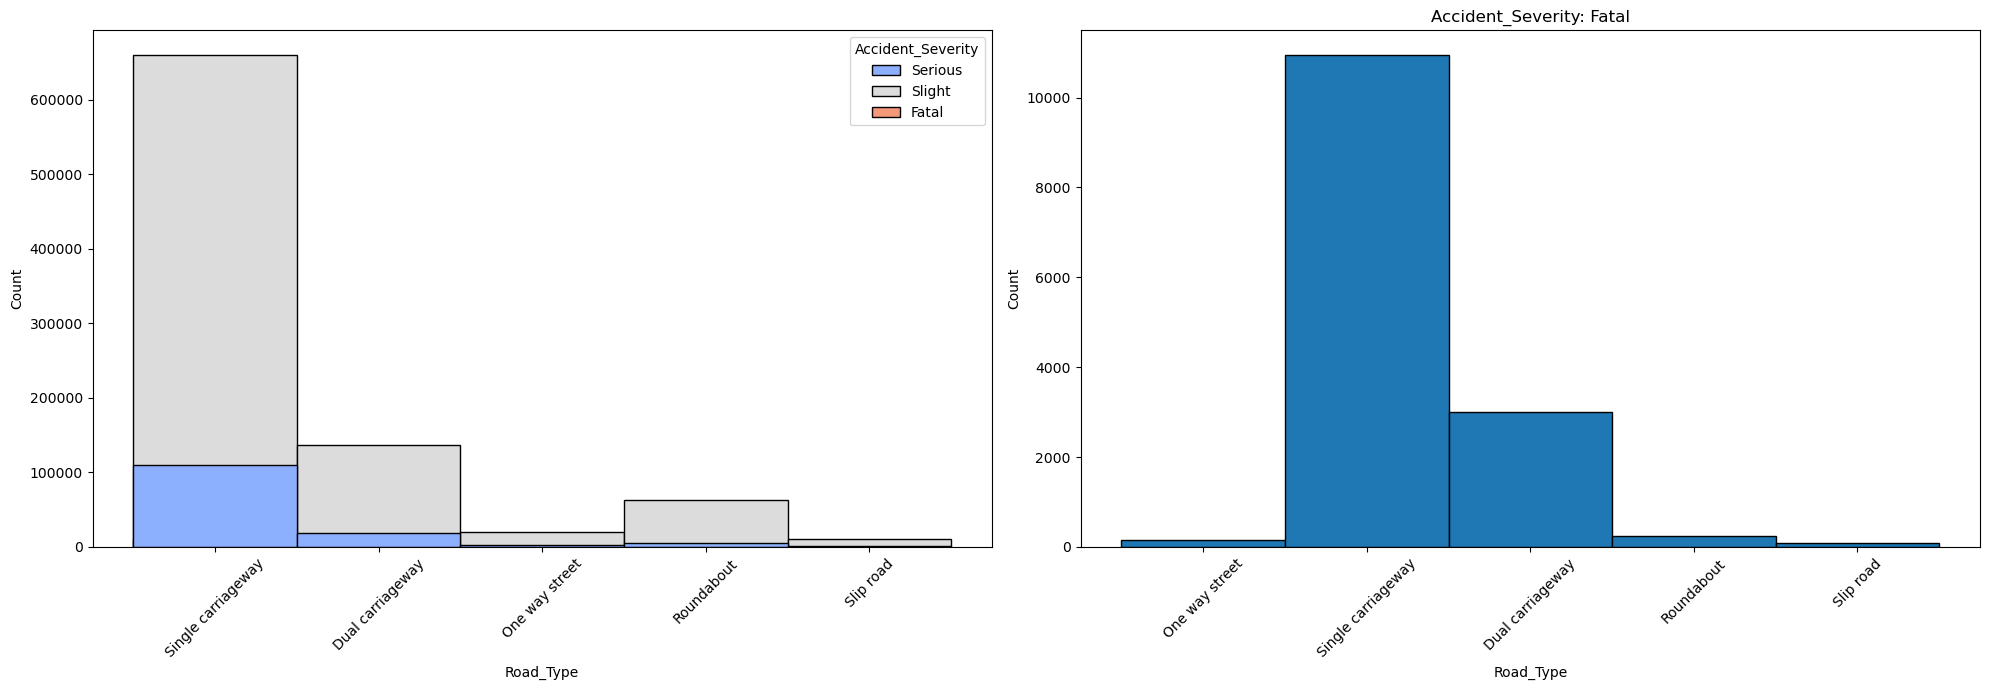

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df, x="Road_Type", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df[df["Accident_Severity"] == "Fatal"], 
             x="Road_Type", palette="tab10", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")
ax[0].tick_params(axis="x", rotation=45)
ax[1].tick_params(axis="x", rotation=45)
plt.tight_layout();

In [84]:
df[df["Road_Type"] == "Dual carriageway"]["1st_Road_Class"][:5]

1     B
7     A
14    A
22    A
24    A
Name: 1st_Road_Class, dtype: object

<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div>

- Most accidents occured in Single carriageway